# 5. Map Overlays and Saving

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## Map overlays

We overlay our data in a map to visualize and explore locations and relationships. 

Using what we learned in the last notebook, we'll need to transform our CRS first.

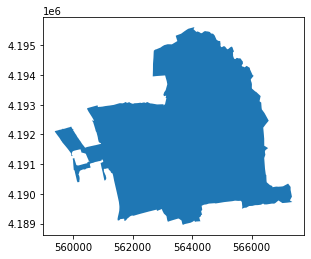

In [2]:
berkeley_outline = gpd.read_file("zip://../qgis_workshop_data/BerkeleyCityLimits.zip")
berkeley_outline.plot()

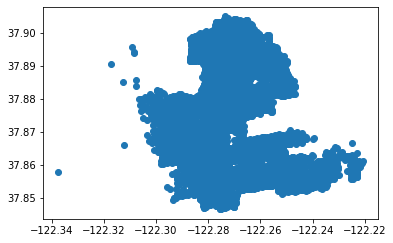

In [3]:
berkeley_parcels_gdf = gpd.read_file("../qgis_workshop_data/parcel_pts_rand30pct.geojson")
berkeley_parcels_gdf = berkeley_parcels_gdf.loc[berkeley_parcels_gdf['SIT_CITY']== 'Berkeley'].copy().reset_index()
berkeley_parcels_gdf.plot()

In [4]:
berkeley_outline.crs == berkeley_parcels_gdf.crs

False

In [5]:
berkeley_outline.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 126°W to 120°W - by country
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
berkeley_parcels_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
berkeley_parcels_gdf = berkeley_parcels_gdf.to_crs('epsg:32610')

In [8]:
berkeley_outline.crs == berkeley_parcels_gdf.crs

True

In [9]:
def rescale_val(val, oldmin, oldmax, newmin, newmax):
    '''
    Rescale a value from a old range to a new range
    '''
    old_range = oldmax - oldmin
    new_range = newmax - newmin
    new_val = int((new_range * (val - oldmin)/ old_range) + newmin)
    return new_val

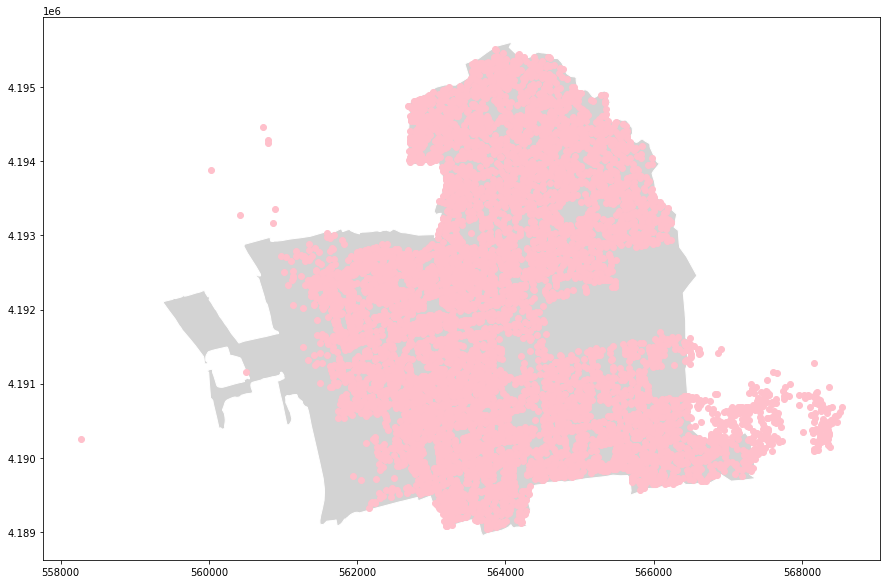

In [10]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

berkeley_parcels_gdf.plot(color="pink", ax=ax)

# # Create a list of the marker sizes based on our data values
# marker_sizes = berkeley_parcels_gdf['totvalue2'].apply(lambda x: 
#                                         rescale_val(x,
#                                                     berkeley_parcels_gdf['totvalue2'].min(),
#                                                     berkeley_parcels_gdf['totvalue2'].max(),
#                                                     5,
#                                                     200))
# # Add the points to the map
# berkeley_parcels_gdf.plot(ax=ax,
#                           edgecolor='purple',
#                           color="pink",  
#                           alpha=0.35, 
#                           linewidths=1,
#                           legend=True,
#                           markersize = marker_sizes
#                         )      


plt.show()

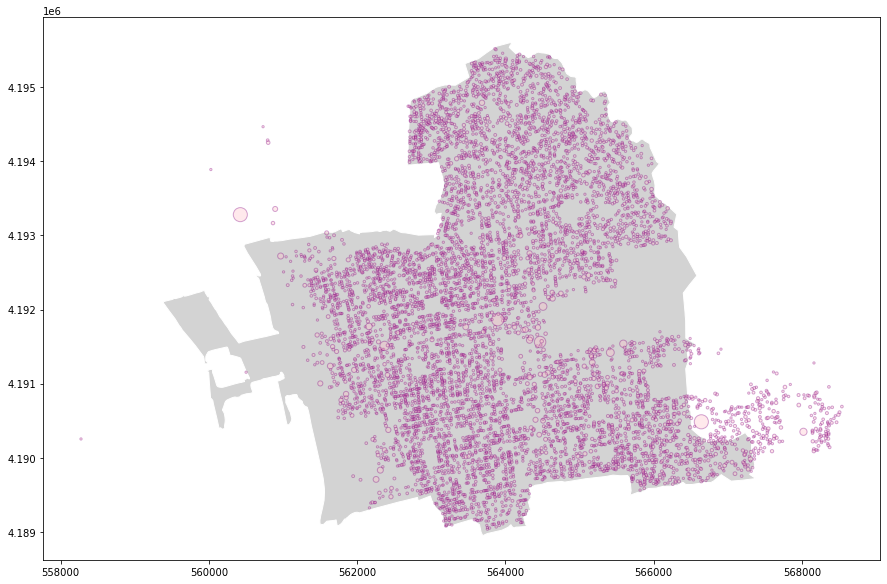

In [11]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Create a list of the marker sizes based on our data values
marker_sizes = berkeley_parcels_gdf['totvalue2'].apply(lambda x: 
                                        rescale_val(x,
                                                    berkeley_parcels_gdf['totvalue2'].min(),
                                                    berkeley_parcels_gdf['totvalue2'].max(),
                                                    5,
                                                    200))
# Add the points to the map
berkeley_parcels_gdf.plot(ax=ax,
                          edgecolor='purple',
                          color="pink",  
                          alpha=0.35, 
                          linewidths=1,
                          legend=True,
                          markersize = marker_sizes
                        )      


plt.show()

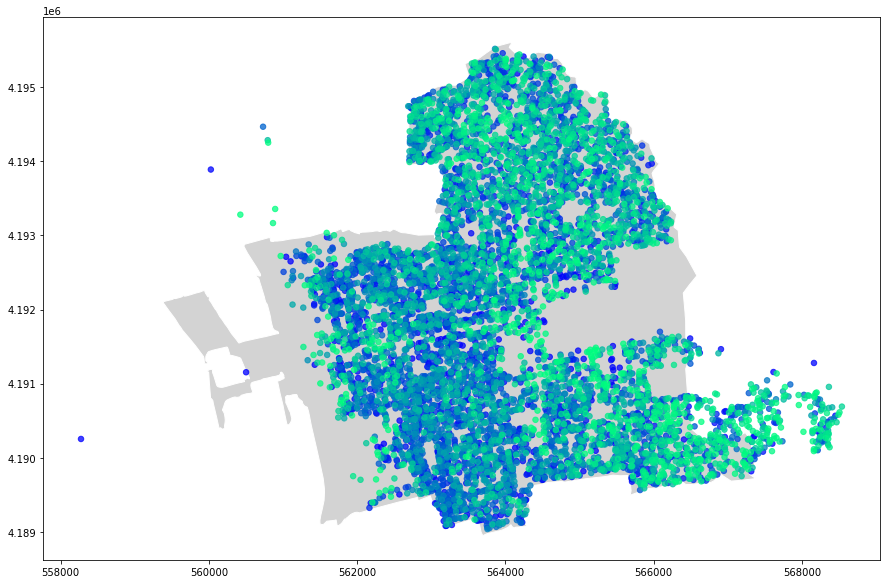

In [12]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Add the points to the map
berkeley_parcels_gdf.sort_values(by='totvalue2').plot(ax=ax,
                                                      legend=True, 
                                                      cmap="winter",
                                                      alpha=0.75,
                                                      markersize=30,
                                                      vmin=1)  # Set a value for the low vis value

plt.show()

 
<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">
 
 

#### Question
</div>

Why do you think we added the `sort_values(by="units_permit")` to the plot command above?

In [13]:
# Your thoughts here

# Saving maps

You can save your maps with the `plt.savefig` method.

> **Important**: you must `plt.savefig` your map before you display it with `plt.show()`! 

For example...

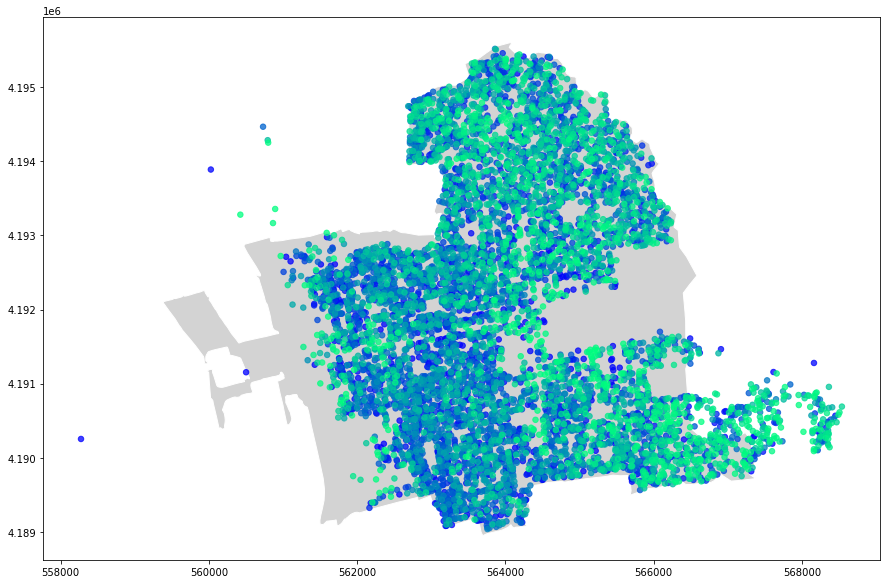

In [14]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Add the points to the map
berkeley_parcels_gdf.sort_values(by='totvalue2').plot(ax=ax,
                                                      legend=True, 
                                                      cmap="winter",
                                                      alpha=0.75,
                                                      markersize=30,
                                                      vmin=1)  # Set a value for the low vis value

# Save figure 
plt.savefig("Berkeley_parcel_total_value.png")

# Then show plot
plt.show()

Take a look at your saved map file (double-click in this cell to see how this is done.)

![mymap](Berkeley_parcel_total_value.png)

### Saving a geodataframe to a file

Let's not forget to save out our Alameda County geodataframe `berkeley_parcels_gdf`. By saving it we will not need to repeat the processing steps and attribute join we did above.

We can save to a shapefile.

In [15]:
berkeley_parcels_gdf.to_file("../outdata/berkeley_parcels_gdf.shp")

One of the problems of saving to a shapefile is that our column names get truncated to 10 characters (a shapefile limitation.) 

Instead of renaming all columns with obscure names that are less than 10 characters, we can save our geodatafraem to a spatial data file format that does not have this limation - [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) or [GPKG](https://en.wikipedia.org/wiki/GeoPackage) (geopackage) file.
- These formats have the added benefit of outputting only one file in contrast tothe multi-file shapefile format.

In [16]:
berkeley_parcels_gdf.to_file("../outdata/berkeley_parcels_gdf.json", driver="GeoJSON")

In [17]:
berkeley_parcels_gdf.to_file("../outdata/berkeley_parcels_gdf.gpkg", driver="GPKG")

We can also save out our data as a csv, dropping the geometry column.

In [18]:
berkeley_parcels_gdf.drop('geometry',axis=1).to_csv("../outdata/berkeley_parcels_gdf.csv") 

We can also save just the tract data we subsetted earlier into its own shapefile

In [19]:
berkeley_parcels_gdf.to_file("../outdata/berkeley_parcels_gdf.shp")

## Challenge